In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ski_data= pd.read_csv('ski_resort_data.csv')

In [8]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [9]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [10]:
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [11]:
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis= 1)
#come back to this in the mentor meeting

In [12]:
missing.columns= ['count', '%']
missing.sort_values(by = 'count')

,count,%
Name,0,0.000000
total_chairs,0,0.000000
double,0,0.000000
triple,0,0.000000
quad,0,0.000000
fastQuads,0,0.000000
fastSixes,0,0.000000
surface,0,0.000000
trams,0,0.000000
base_elev,0,0.000000


In [13]:
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [14]:
ski_data['Name'].value_counts().head()

Name
Crystal Mountain    2
Alyeska Resort      1
Brandywine          1
Boston Mills        1
Alpine Valley       1
Name: count, dtype: int64

In [15]:
(ski_data['Name']+ ', '+ ski_data['Region']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
Name: count, dtype: int64

In [16]:
(ski_data['Name']+ ', '+ ski_data['state']).value_counts().head()

Alyeska Resort, Alaska    1
Snow Trails, Ohio         1
Brandywine, Ohio          1
Boston Mills, Ohio        1
Alpine Valley, Ohio       1
Name: count, dtype: int64

In [17]:
ski_data[ski_data['Name']== 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [18]:
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
Name: count, dtype: int64

In [19]:
ski_data['Region'].value_counts()

Region
New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Connecticut             5
Ohio                    5
Virginia                4
West Virginia           4
Illinois                4
Mt. Hood                4
Alaska                  3
Iowa                    3
South Dakota            2
Arizona                 2
Nevada                  2
Missouri                2
Indiana                 2
New Jersey              2
Rhode Island            1
Tennessee               1
Maryland                1
Northern California     1
Name:

In [20]:
(ski_data[ski_data.Region != ski_data.state].groupby('state')['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: count, dtype: int64

In [21]:
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

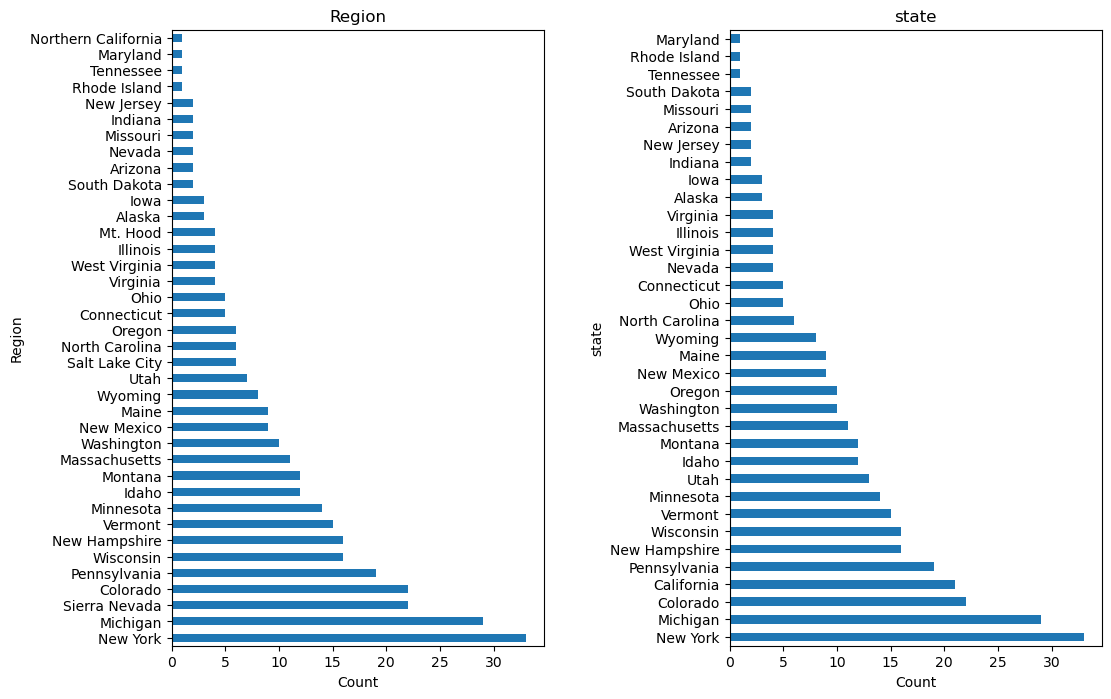

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
ski_data.Region.value_counts().plot(kind = 'barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')
ski_data.state.value_counts().plot(kind = 'barh', ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace = 0.5)
#come back to this during the meeting as well 

In [23]:
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()

In [24]:
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


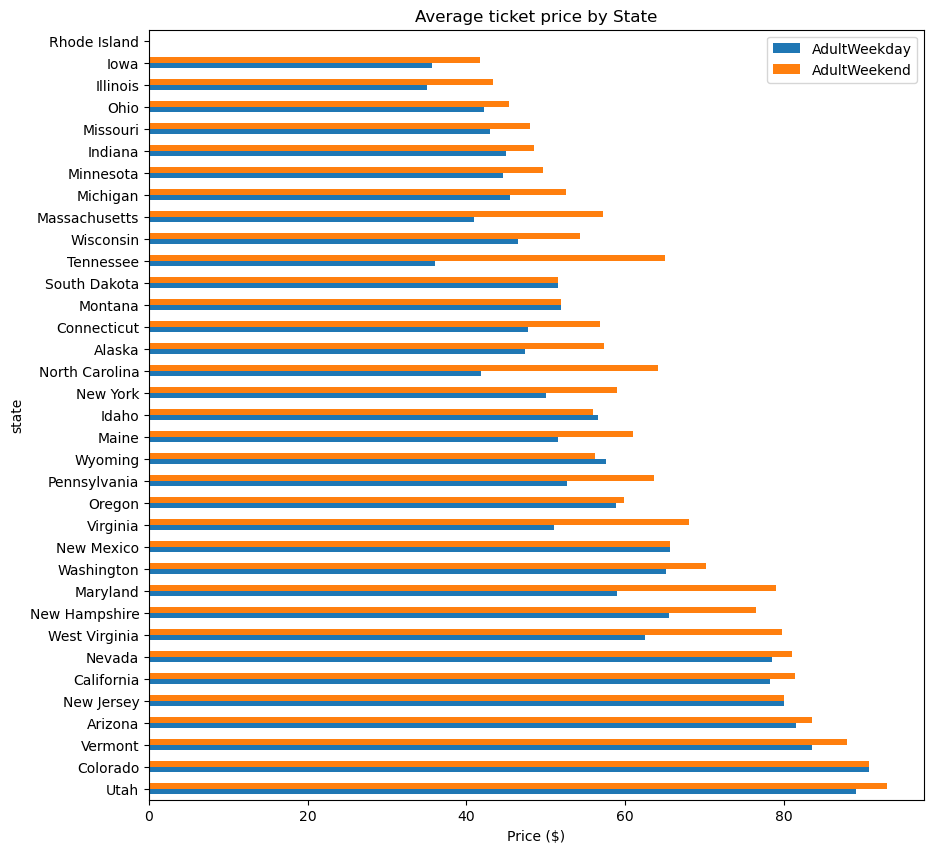

In [25]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [26]:
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']],
                        id_vars = 'state',
                        var_name = 'Ticket',
                        value_vars = ['AdultWeekday', 'AdultWeekend'],
                        value_name = 'Price')

In [27]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


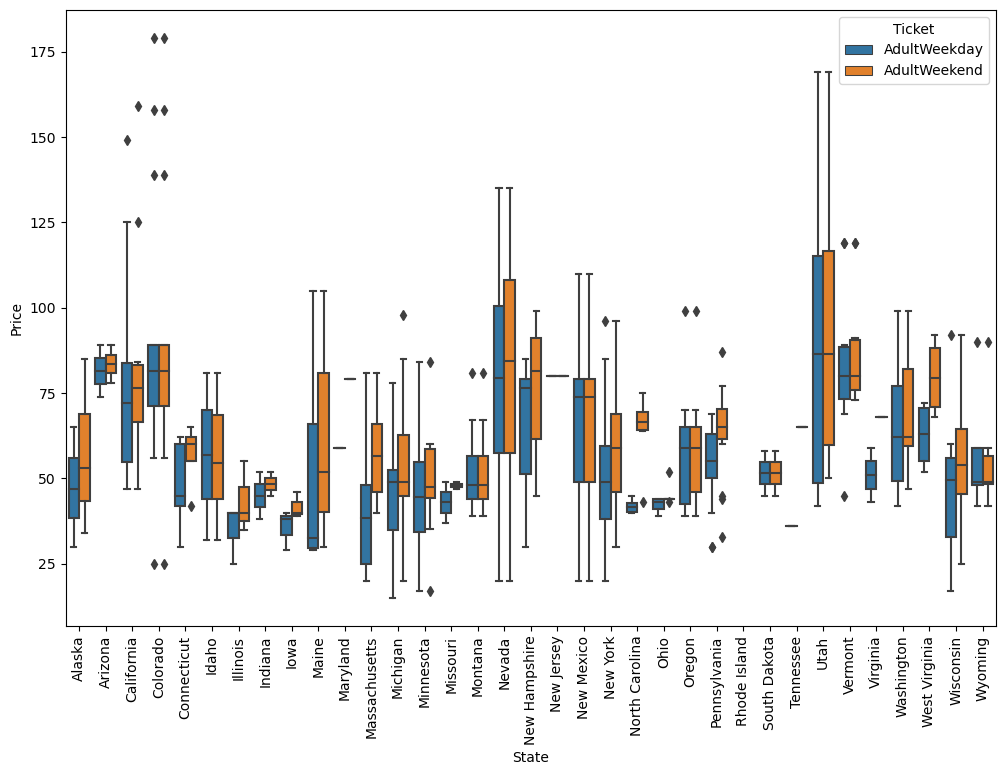

In [28]:
plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'state', y = 'Price', hue = 'Ticket', data = ticket_prices)
plt.xticks(rotation = 'vertical')
plt.xlabel('Price ($)')
plt.xlabel('State');

In [29]:
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


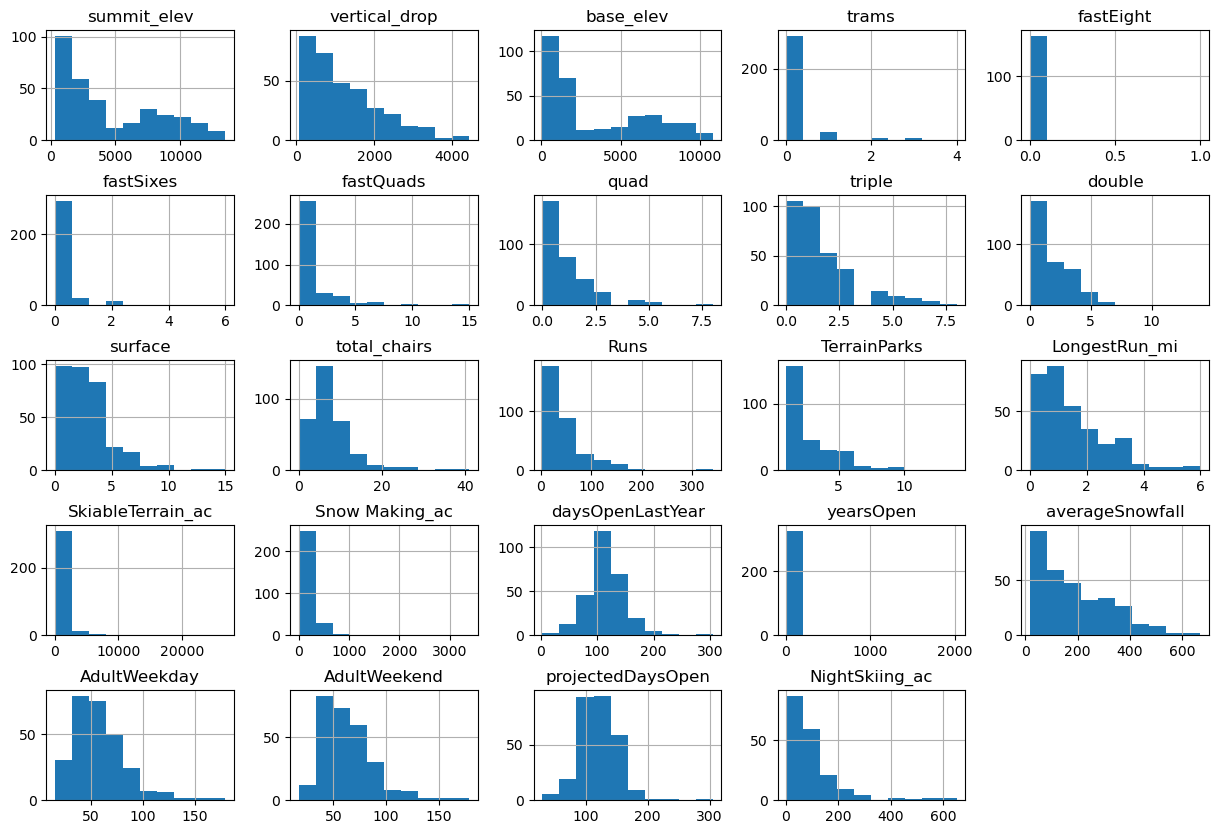

In [30]:
ski_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [31]:
ski_data[ski_data.SkiableTerrain_ac > 10000]

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
39,Silverton Mountain,Colorado,Colorado,13487,3087,10400,0,0.0,0,0,...,1.5,26819.0,NaN,175.0,17.0,400.0,79.0,79.0,181.0,NaN


In [32]:
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


In [33]:
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [34]:
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [35]:
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

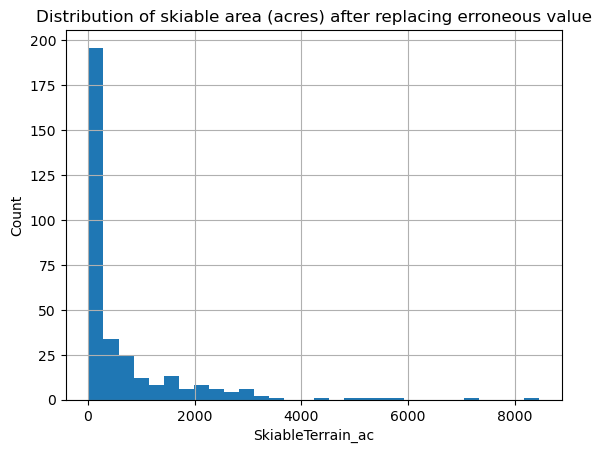

In [36]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

In [37]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]


11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [38]:
ski_data[ski_data['Snow Making_ac'] > 3000].T


,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


In [39]:
ski_data.fastEight.value_counts()

fastEight
0.0    163
1.0      1
Name: count, dtype: int64

In [40]:
ski_data.drop(columns = 'fastEight', inplace = True)


In [41]:
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

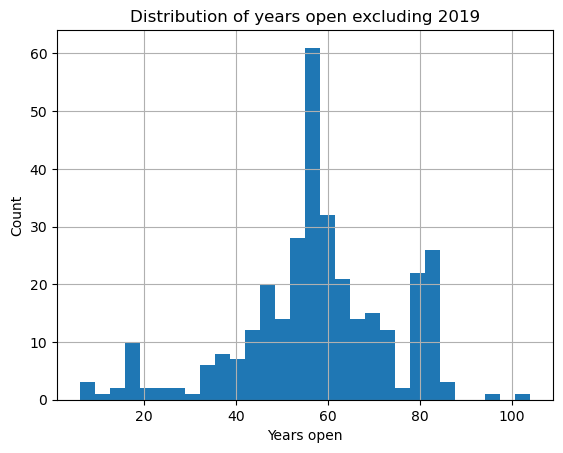

In [42]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins = 30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

In [43]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()


count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [44]:
ski_data = ski_data[ski_data.yearsOpen < 1000]


In [45]:
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), 
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column= 'daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks =pd.NamedAgg(column= 'TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()


,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [46]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price)* 100

0    82.317073
2    14.329268
1     3.353659
Name: count, dtype: float64

In [47]:
ski_data = ski_data[missing_price != 2]

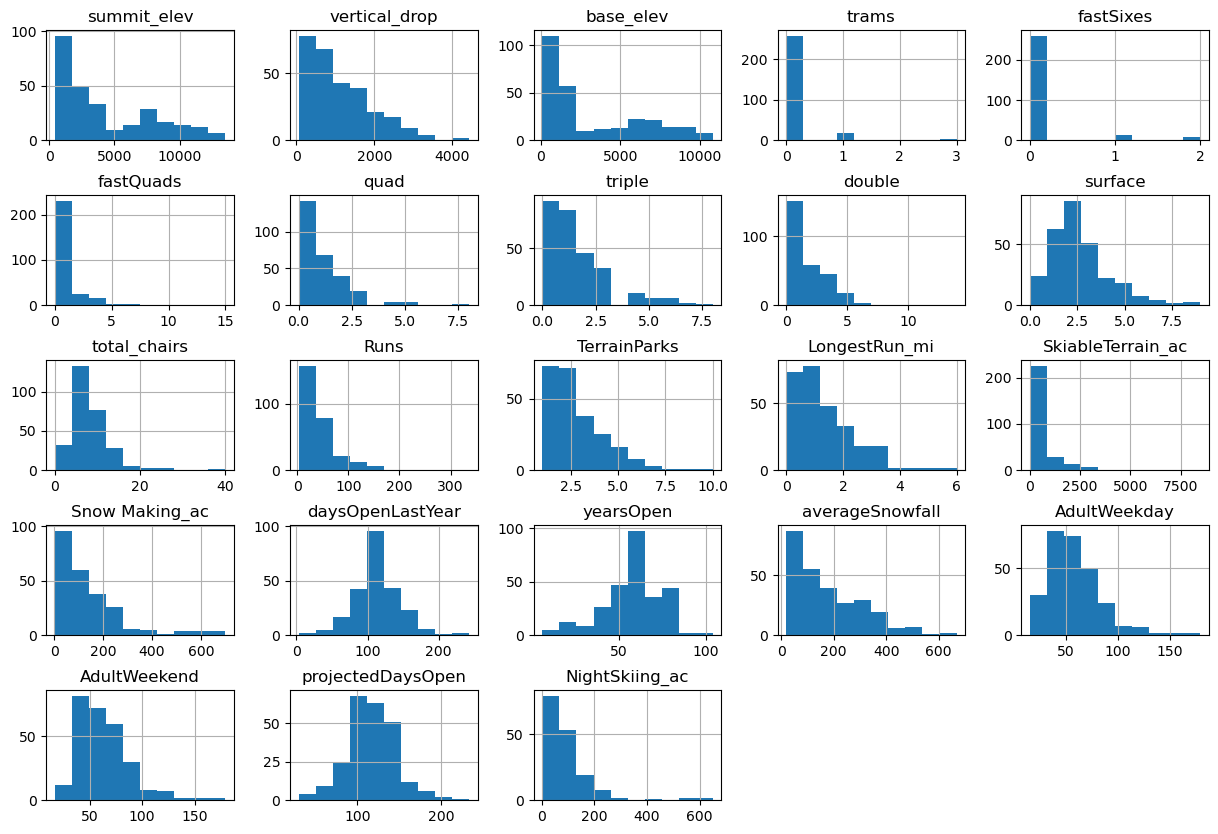

In [48]:
ski_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [49]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [50]:
type(usa_states)

list

In [51]:
len(usa_states)

1

In [52]:
usa_states

[   Name & postal abbs. [1]                                    Cities  \
    Name & postal abbs. [1] Name & postal abbs. [1].1         Capital   
 0                  Alabama                        AL      Montgomery   
 1                   Alaska                        AK          Juneau   
 2                  Arizona                        AZ         Phoenix   
 3                 Arkansas                        AR     Little Rock   
 4               California                        CA      Sacramento   
 5                 Colorado                        CO          Denver   
 6              Connecticut                        CT        Hartford   
 7                 Delaware                        DE           Dover   
 8                  Florida                        FL     Tallahassee   
 9                  Georgia                        GA         Atlanta   
 10                 Hawaiʻi                        HI        Honolulu   
 11                   Idaho                        

In [53]:
usa_states = usa_states[0]

In [54]:
established = usa_states.iloc[:,4]

In [55]:
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

In [56]:
usa_states_sub = usa_states.iloc[:,[0,5,6]].copy()

In [57]:
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [58]:
missing_states = set(state_summary.state)-set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [59]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

In [60]:
usa_states_sub.state.replace(to_replace='\[.*]', value='' , regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]


20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [61]:
missing_states = set(state_summary.state)-set(usa_states_sub.state)
missing_states

set()

In [62]:
state_summary = state_summary.merge(usa_states_sub, on = 'state', how = 'left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


<Axes: xlabel='AdultWeekday', ylabel='AdultWeekend'>

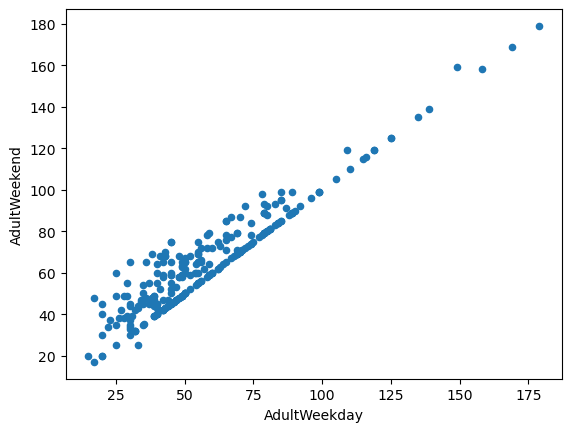

In [63]:
ski_data.plot(x ='AdultWeekday' , y='AdultWeekend' , kind = 'scatter')

In [64]:
ski_data.loc[ski_data.state == 'Montana',['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [65]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()


AdultWeekend    4
AdultWeekday    7
dtype: int64

In [66]:
ski_data.drop(columns='AdultWeekday', inplace = True)

In [67]:
ski_data.dropna(subset = ['AdultWeekend'], inplace= True)

In [68]:
ski_data.shape

(277, 25)

In [69]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [70]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [71]:
missing['%'].value_counts()

%
0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: count, dtype: int64

In [72]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non-null

In [73]:
ski_data.to_csv('ski_data_cleansed.csv', index = False)

In [74]:
state_summary.to_csv('state_summary.csv', index = False)

In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [76]:
ski_data = pd.read_csv('ski_data_cleansed.csv')

In [77]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [78]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [79]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [80]:
state_summary = pd.read_csv('state_summary.csv')

In [81]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [82]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


In [83]:
state_summary_newind = state_summary.set_index('state')


In [84]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

In [85]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

In [86]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

In [87]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

In [88]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

In [89]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

In [90]:
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


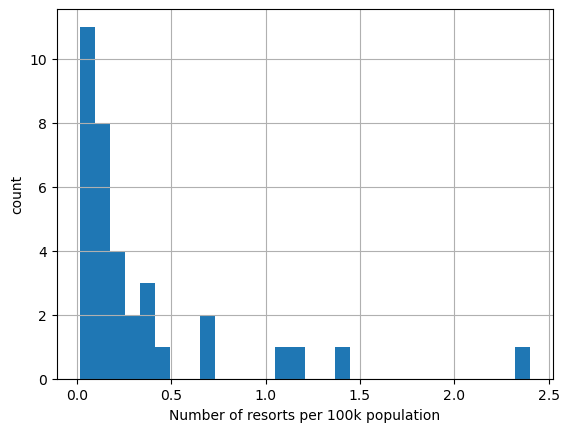

In [91]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

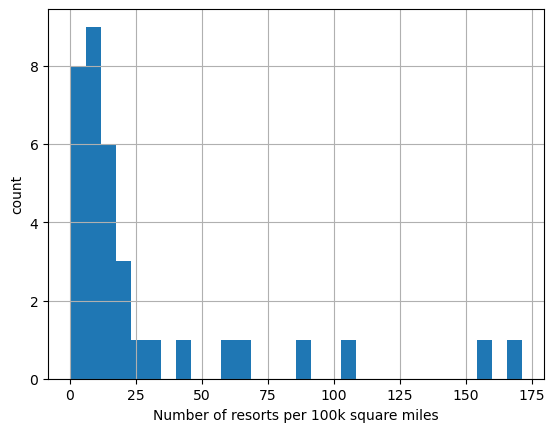

In [92]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

In [93]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [94]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [95]:
state_summary_scale = state_summary.set_index('state')
state_summary_index = state_summary_scale.index
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [96]:
state_summary_scale = scale(state_summary_scale)

In [97]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns= state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [98]:
state_summary_scaled_df.mean()

resorts_per_state             -7.295751e-17
state_total_skiable_area_ac   -4.163336e-17
state_total_days_open          7.692260e-17
state_total_terrain_parks      4.599495e-17
state_total_nightskiing_ac     7.612958e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

In [99]:
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

In [100]:
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [101]:
state_pca = PCA().fit(state_summary_scale)

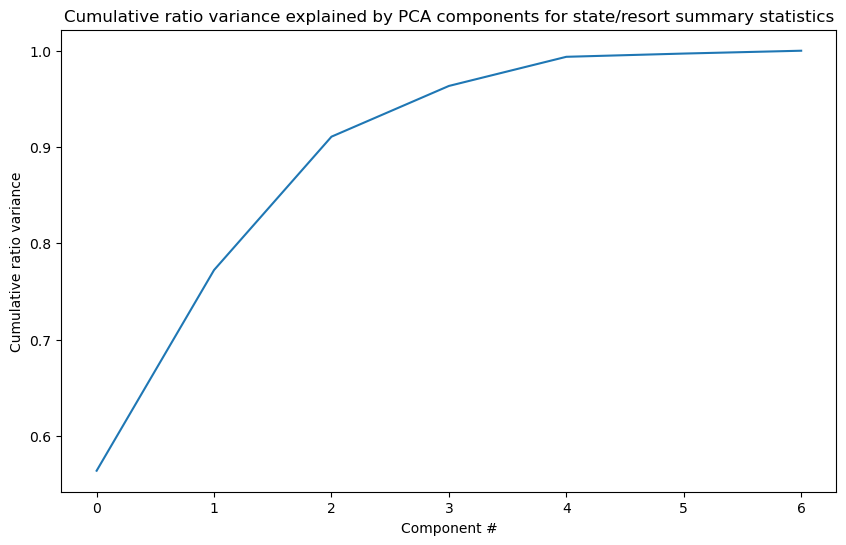

In [102]:
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative ratio variance explained by PCA components for state/resort summary statistics');

In [103]:
state_pca_x = state_pca.transform(state_summary_scale)

In [104]:
state_pca_x.shape

(35, 7)

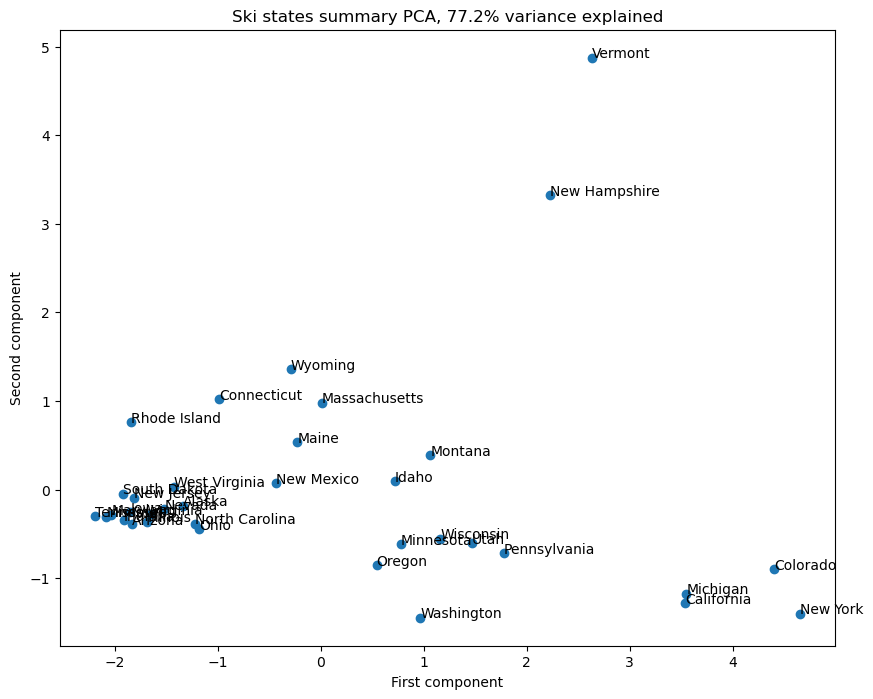

In [105]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

In [106]:
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

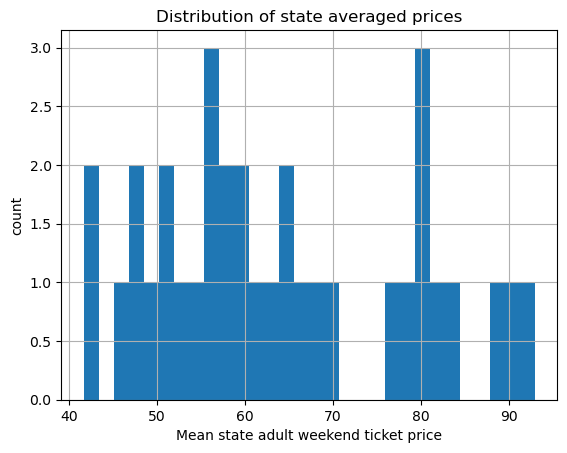

In [107]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

In [108]:
pca_df = pd.DataFrame({'PC1': state_pca_x[:,0], 'PC2': state_pca_x[:,1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.336533,-0.182208
Arizona,-1.839049,-0.387959
California,3.537857,-1.282509
Colorado,4.402210,-0.898855
Connecticut,-0.988027,1.020218


In [109]:
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [110]:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [111]:
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.336533,-0.182208,57.333333
Arizona,-1.839049,-0.387959,83.500000
California,3.537857,-1.282509,81.416667
Colorado,4.402210,-0.898855,90.714286
Connecticut,-0.988027,1.020218,56.800000


In [112]:
pca_df['Quartile'] = pd.qcut(pca_df['AdultWeekend'], q = 4, precision = 1)

In [113]:
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.336533,-0.182208,57.333333,"(53.1, 60.4]"
Arizona,-1.839049,-0.387959,83.500000,"(78.4, 93.0]"
California,3.537857,-1.282509,81.416667,"(78.4, 93.0]"
Colorado,4.402210,-0.898855,90.714286,"(78.4, 93.0]"
Connecticut,-0.988027,1.020218,56.800000,"(53.1, 60.4]"


In [114]:
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [115]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.843646,0.761339,NaN,NaN


In [116]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_1748/2495745839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_1748/2495745839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

PC1             -1.843646
PC2              0.761339
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

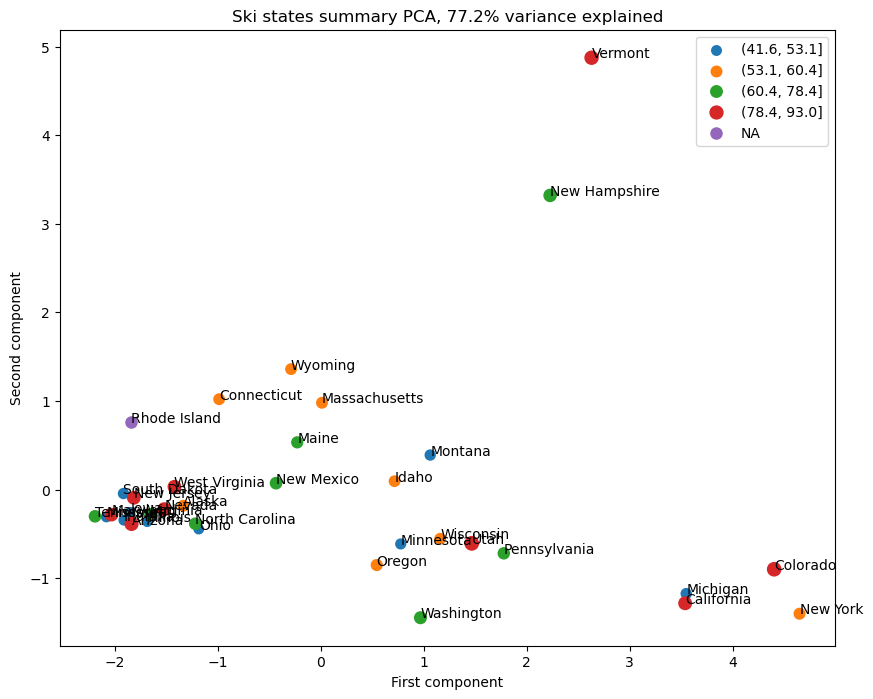

In [117]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

NameError: name 'pca_var' is not defined

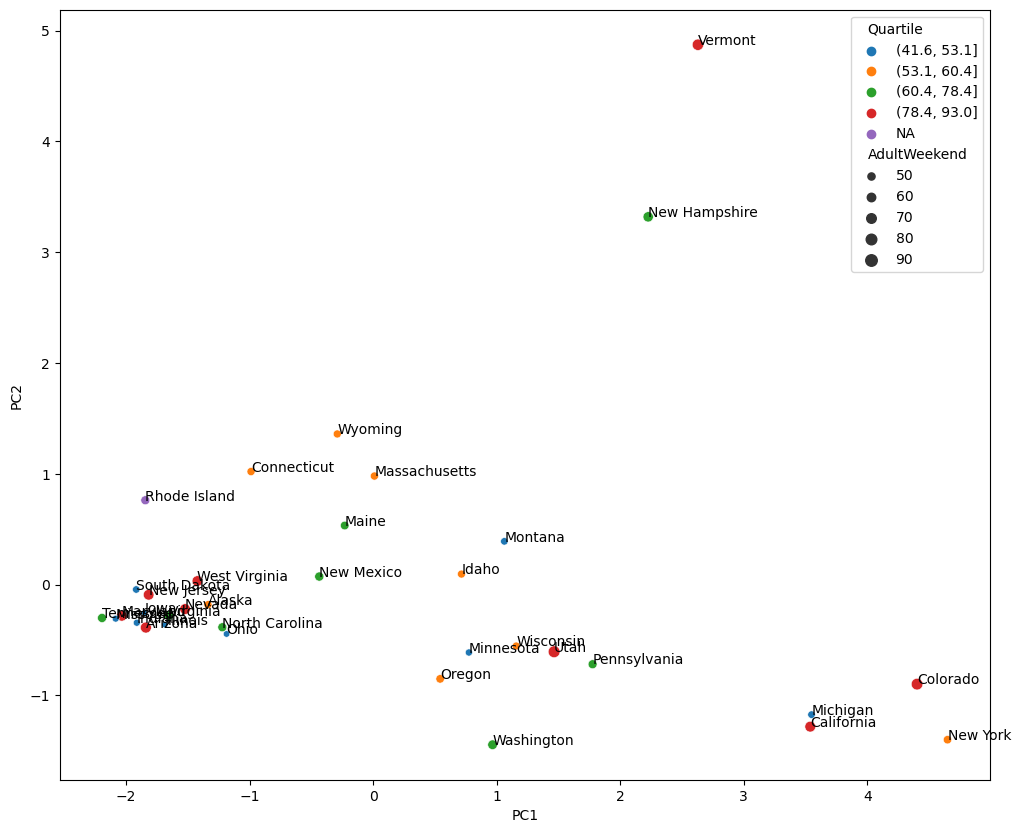

In [118]:
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
sns.scatterplot(x='PC1', y = 'PC2', size = 'AdultWeekend', hue = 'Quartile', hue_order = pca_df.Quartile.cat.categories, data = pca_df)
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x,y))
plt.title(f'Ski states summary PCA, {pca_var:.1f}% variance explained');

In [120]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486079,0.318224,0.489997,0.488420,0.334398,0.187154,0.192250
1,-0.085092,-0.142204,-0.045071,-0.041939,-0.351064,0.662458,0.637691
2,-0.177937,0.714835,0.115200,0.005509,-0.511255,0.220359,-0.366207
3,0.056163,-0.118347,-0.162625,-0.177072,0.438912,0.685417,-0.512443
4,-0.209186,0.573462,-0.250521,-0.388608,0.499801,-0.065077,0.399461
5,-0.818390,-0.092319,0.238198,0.448118,0.246196,0.058911,-0.009146
6,-0.090273,-0.127021,0.773728,-0.613576,0.022185,-0.007887,-0.005631


In [121]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [122]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


In [123]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [124]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [125]:
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [126]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,AdultWeekend,projectedDaysOpen,NightSkiing_ac,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,85.0,150.0,550.0,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,53.0,90.0,NaN,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,34.0,152.0,30.0,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,89.0,122.0,NaN,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,78.0,104.0,80.0,2,1577.0,237.0,6.0,80.0,0.027477,1.754540


In [127]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

In [128]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


ValueError: could not convert string to float: 'Alyeska Resort'

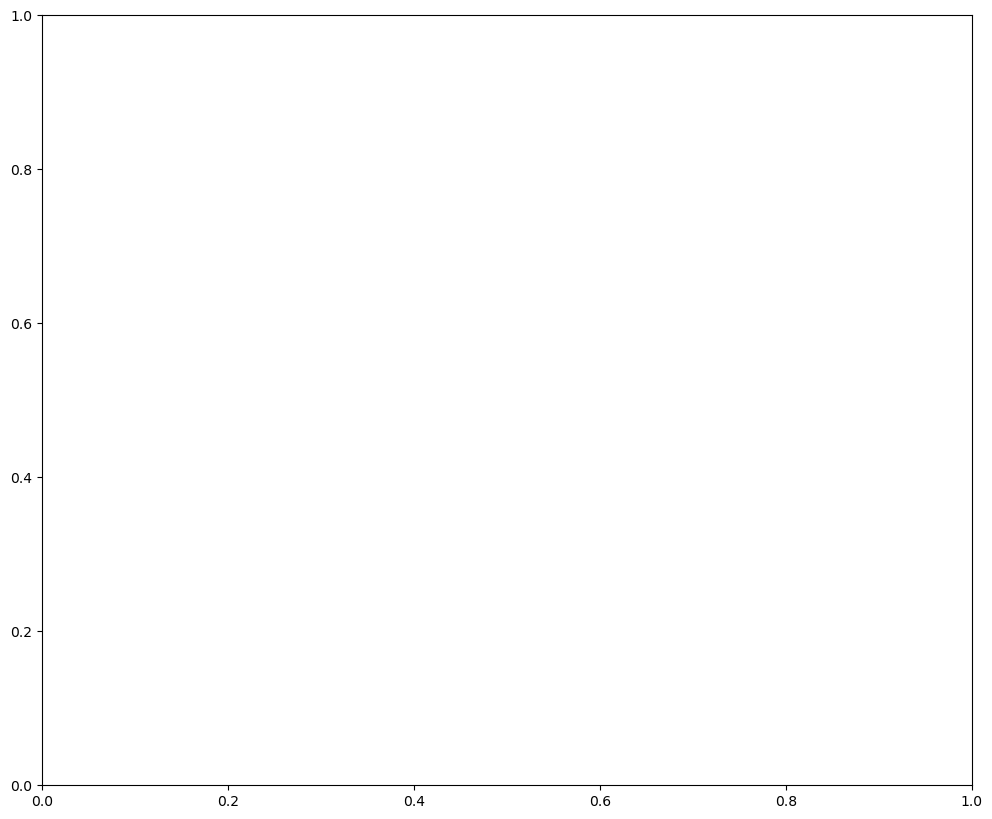

In [129]:
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

In [131]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [132]:
features = [feature for feature in ski_data.columns if feature not in ['Name','Region', 'state','AdultWeekend']]

In [133]:
print(features)

['summit_elev', 'vertical_drop', 'base_elev', 'trams', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'projectedDaysOpen', 'NightSkiing_ac', 'resorts_per_state', 'resorts_per_100kcapita', 'resorts_per_100ksq_mile', 'resort_skiable_area_ac_state_ratio', 'resort_days_open_state_ratio', 'resort_terrain_park_state_ratio', 'resort_night_skiing_state_ratio']


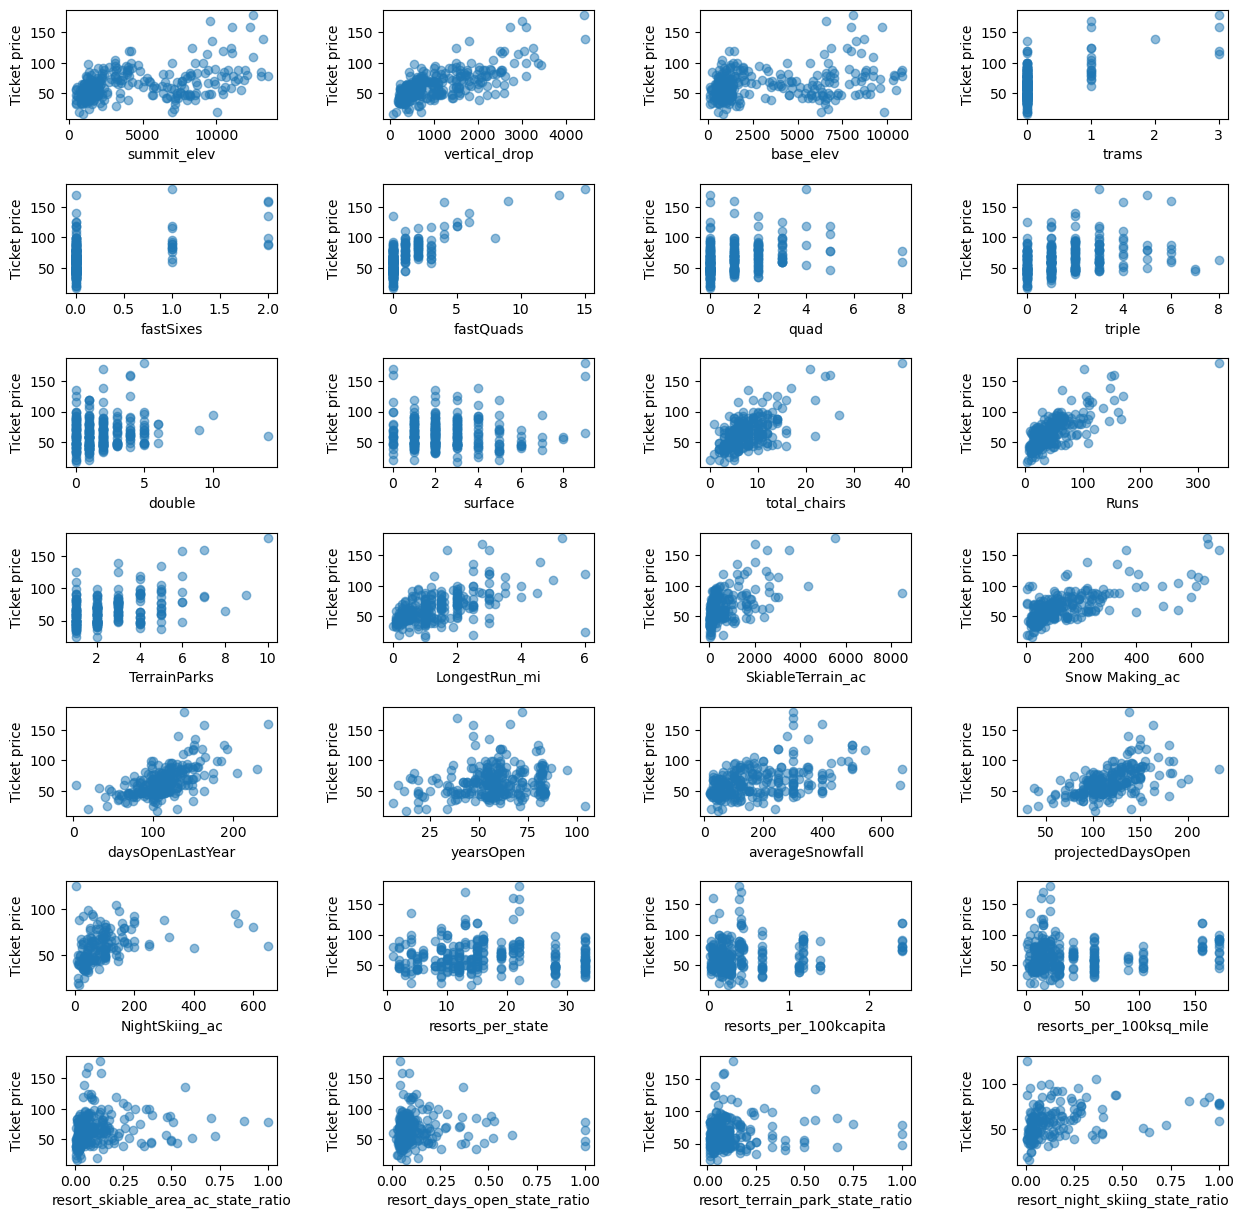

In [134]:
scatterplots(features, ncol= 4, figsize = (15,15))

In [135]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

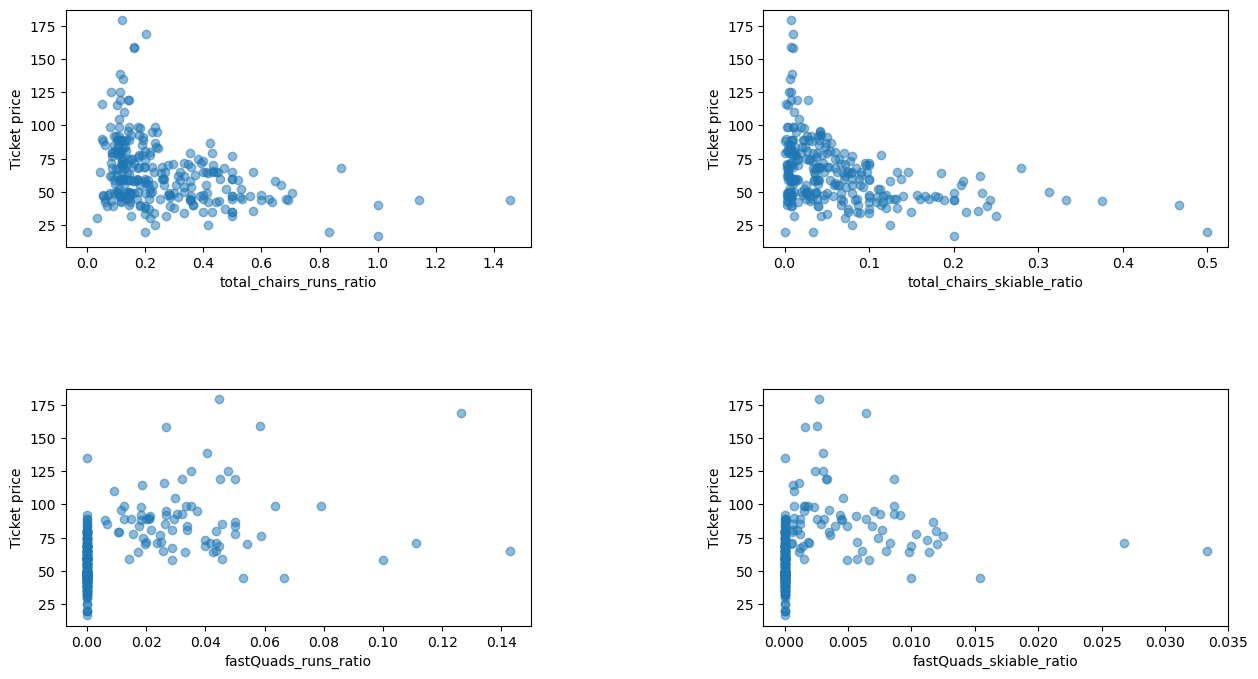

In [136]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

In [137]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [138]:
ski_data.to_csv('ski_data_step3_features.csv')

In [139]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [140]:
ski_data = pd.read_csv('ski_data_step3_features.csv')

In [141]:
ski_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1


In [142]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [143]:
big_mountain.T

,124
Unnamed: 0,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3


In [144]:
ski_data.shape

(277, 37)

In [145]:
ski_data = ski_data[ski_data.Name != 'Big Mountain Resort']

In [146]:
ski_data.shape

(276, 37)

In [147]:
len(ski_data) * .7, len(ski_data) * .3

(193.2, 82.8)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(ski_data.drop(columns='AdultWeekend'), 
                                                    ski_data.AdultWeekend, test_size=0.3, 
                                                    random_state=47)

In [149]:
X_train.shape, X_test.shape

((193, 36), (83, 36))

In [150]:
y_train.shape, y_test.shape

((193,), (83,))

In [151]:
names_list = ['Name', 'state', 'Region']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns = names_list, inplace = True) 
X_test.drop(columns = names_list, inplace = True)
X_train.shape, X_test.shape

((193, 33), (83, 33))

In [152]:
X_train.dtypes

Unnamed: 0                              int64
summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                    

In [153]:
X_test.dtypes

Unnamed: 0                              int64
summit_elev                             int64
vertical_drop                           int64
base_elev                               int64
trams                                   int64
fastSixes                               int64
fastQuads                               int64
quad                                    int64
triple                                  int64
double                                  int64
surface                                 int64
total_chairs                            int64
Runs                                  float64
TerrainParks                          float64
LongestRun_mi                         float64
SkiableTerrain_ac                     float64
Snow Making_ac                        float64
daysOpenLastYear                      float64
yearsOpen                             float64
averageSnowfall                       float64
projectedDaysOpen                     float64
NightSkiing_ac                    

In [154]:
train_mean = y_train.mean()

In [155]:
train_mean

63.811088082901556

In [156]:
dumb_reg = DummyRegressor(strategy = 'mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[63.81108808]])

In [157]:
def r_squared(y, ypred):
    ybar = np.sum(y)/len(y)
    sum_sq_tot = np.sum((y-ybar)**2)
    sum_sq_res = np.sum((y-ypred)**2)
    R2 = 1.0 - sum_sq_res/sum_sq_tot
    return R2

In [158]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [159]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([63.81108808, 63.81108808, 63.81108808, 63.81108808, 63.81108808])

In [160]:
r_squared(y_train, y_tr_pred)

0.0

In [161]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.0031235200417913944

In [162]:
def mae(y, ypred):
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [163]:
mae(y_train, y_tr_pred)

17.92346371714677

In [164]:
mae(y_test, y_te_pred)

19.136142081278486

In [165]:
def mse(y, ypred):
    sq_error = (y- ypred)**2
    mse = np.mean(sq_error)
    return mse

In [166]:
mse(y_train, y_tr_pred)

614.1334096969046

In [167]:
mse(y_test, y_te_pred)

581.4365441953483

In [168]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([24.78171523, 24.11299534])

In [169]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0031235200417913944)

In [170]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(17.92346371714677, 19.136142081278486)

In [171]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(614.1334096969046, 581.4365441953483)

In [172]:
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [173]:
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.0031235200417913944, 0.0)

In [174]:
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

(0.0, -3.041041349306602e+30)

In [175]:
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_1748/1060303688.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = 1.0 - sum_sq_res/sum_sq_tot


(-0.0031235200417913944, -inf)

In [176]:
X_defaults_median = X_train.median()
X_defaults_median

Unnamed: 0                             145.000000
summit_elev                           2215.000000
vertical_drop                          750.000000
base_elev                             1300.000000
trams                                    0.000000
fastSixes                                0.000000
fastQuads                                0.000000
quad                                     1.000000
triple                                   1.000000
double                                   1.000000
surface                                  2.000000
total_chairs                             7.000000
Runs                                    28.000000
TerrainParks                             2.000000
LongestRun_mi                            1.000000
SkiableTerrain_ac                      170.000000
Snow Making_ac                          96.500000
daysOpenLastYear                       109.000000
yearsOpen                               57.000000
averageSnowfall                        120.000000


In [177]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [178]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [179]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [180]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [181]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.8209705109975863, 0.7434027343760472)

In [182]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(8.33726582127126, 9.084399038007632)

In [183]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

In [184]:
median_mse

(109.9479905173468, 148.73046478678052)

In [185]:
X_defaults_mean = X_train.mean()
X_defaults_mean

Unnamed: 0                             142.730570
summit_elev                           4074.554404
vertical_drop                         1043.196891
base_elev                             3020.512953
trams                                    0.103627
fastSixes                                0.072539
fastQuads                                0.673575
quad                                     1.010363
triple                                   1.440415
double                                   1.813472
surface                                  2.497409
total_chairs                             7.611399
Runs                                    41.188482
TerrainParks                             2.434783
LongestRun_mi                            1.293122
SkiableTerrain_ac                      448.785340
Snow Making_ac                         129.601190
daysOpenLastYear                       110.100629
yearsOpen                               56.559585
averageSnowfall                        162.310160


In [186]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [187]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [188]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [189]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [190]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8203480575922536, 0.7394621117859528)

In [191]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.330318948306315, 9.118668164927447)

In [192]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(110.33025994954124, 151.01455237418668)

In [193]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [194]:
type(pipe)

sklearn.pipeline.Pipeline

In [195]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [196]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [197]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [198]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.8209705109975863, 0.7434027343760472)

In [199]:
median_r2

(0.8209705109975863, 0.7434027343760472)

In [200]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(8.33726582127126, 9.084399038007632)

In [201]:
median_mae

(8.33726582127126, 9.084399038007632)

In [202]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(109.9479905173468, 148.73046478678052)

In [203]:
median_mse

(109.9479905173468, 148.73046478678052)

In [204]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [205]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x18041df80>)),
                ('linearregression', LinearRegression())])

In [206]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [207]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7674914326052744, 0.6259877354190837)

In [208]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.501495079727485, 11.201830190332055)

In [209]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

In [210]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x18041df80>)),
                ('linearregression', LinearRegression())])

In [211]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [212]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.7924096060483825, 0.63761999731708)

In [213]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(9.211767769307114, 10.488246867294352)

In [214]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [215]:
cv_scores = cv_results['test_score']
cv_scores

array([0.63760862, 0.72831381, 0.74443537, 0.5487915 , 0.50441472])

In [216]:
np.mean(cv_scores), np.std(cv_scores)

(0.6327128053007862, 0.09502487849877699)

In [217]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.44, 0.82])

In [218]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [219]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [220]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [221]:
lr_grid_cv.fit(X_train, y_train)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x18041df80>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [222]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [223]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

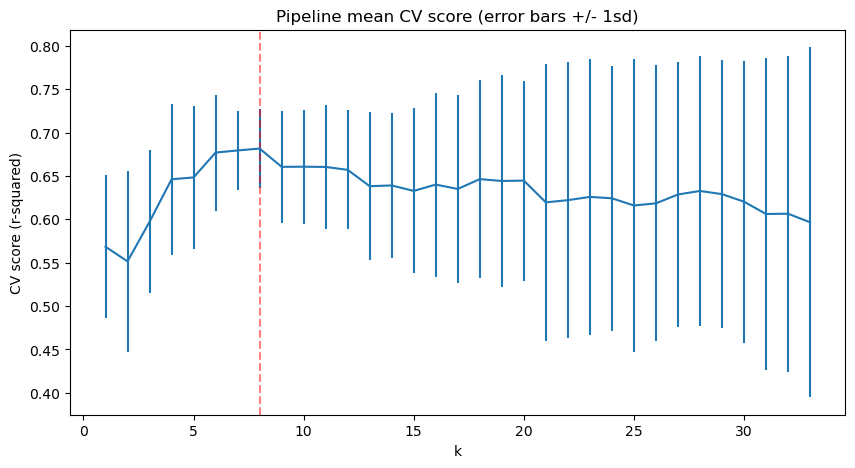

In [224]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [225]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [226]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

vertical_drop        10.767857
Snow Making_ac        6.290074
total_chairs          5.794156
fastQuads             5.745626
Runs                  5.370555
LongestRun_mi         0.181814
trams                -4.142024
SkiableTerrain_ac    -5.249780
dtype: float64

In [227]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [228]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [229]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.68237852, 0.80140231, 0.77947476, 0.63805262, 0.68744897])

In [230]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.717751434085427, 0.06217495059939769)

In [231]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [232]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid = grid_params,cv = 5, n_jobs = 1)

In [233]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [234]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 69,
 'simpleimputer__strategy': 'median',
 'standardscaler': None}

In [235]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.69107651, 0.80828791, 0.77610257, 0.64920845, 0.71805457])

In [236]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.7285460026289698, 0.05732168842372513)

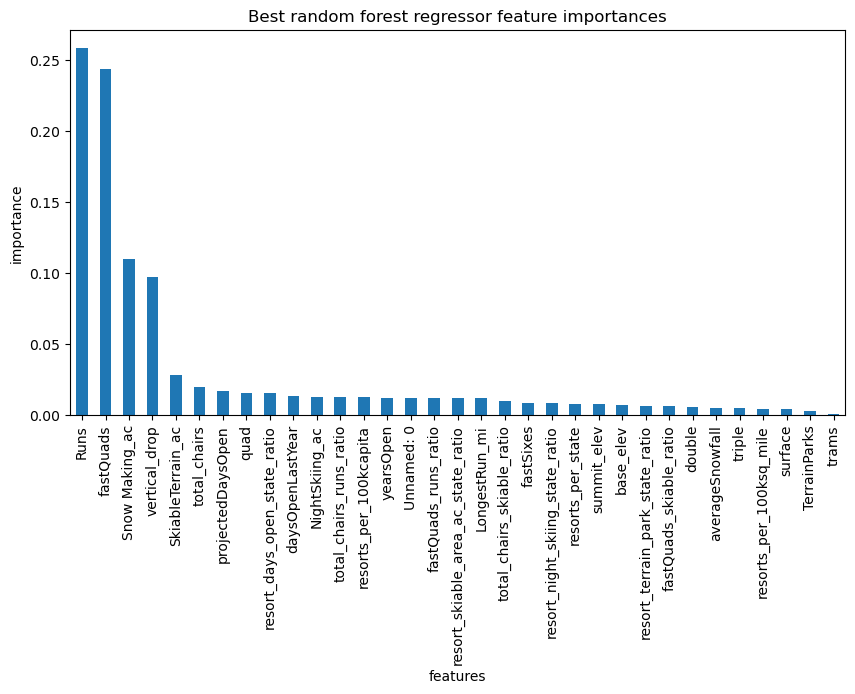

In [237]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [238]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [239]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(10.499032338015294, 1.6220608976799658)

In [240]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

11.793465668669324

In [241]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [242]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(9.491052944512898, 1.4636128123642218)

In [243]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))


9.478220708922649

In [244]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

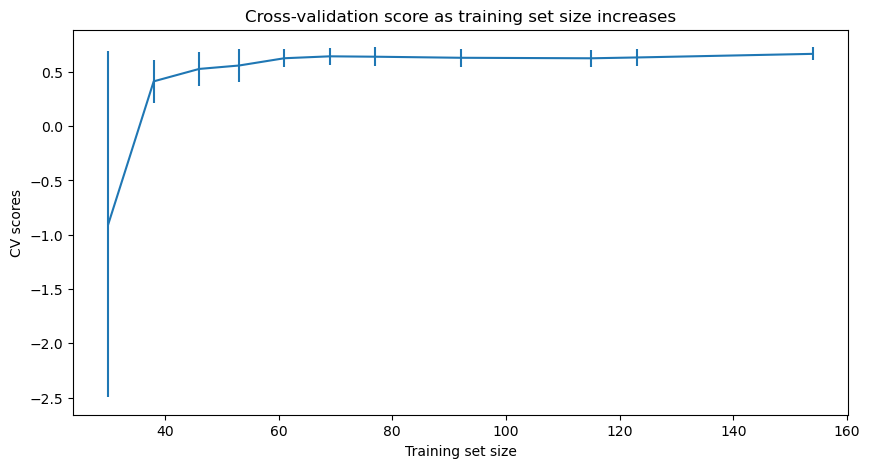

In [245]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [246]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [247]:
pickle.dump(best_model, open ('ski_resort_pricing_model.pkl', 'wb'))

In [248]:
expected_model_version = '1.0'
model_path = 'ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [295]:
ski_data = pd.read_csv('ski_data_step3_features.csv')

In [297]:
big_mountain = ski_data[ski_data.Name == 'Big Mountain Resort']

In [298]:
big_mountain.T

,124
Unnamed: 0,124
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastSixes,0
fastQuads,3


In [268]:
# Refit model on all available data (excluding Big Mountain)
X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']


In [269]:
len(X), len(y)

(276, 276)

In [270]:
model.fit(X,y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=69, random_state=47))])

model.fit(X,y)

In [271]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv = 5, n_jobs = -1)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked

In [272]:
cv_results['test_score']

array([-12.24674172,  -8.89631884, -11.3451726 ,  -7.79496179,
       -11.02594993])

In [273]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(10.261828976096366, 1.6521164889868079)

In [274]:
ski_data.loc[ski_data.Name == "Big Mountain Resort"]

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
124,124,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0,3,...,1.122778,8.161045,0.140121,0.129338,0.148148,0.84507,0.133333,0.004667,0.028571,0.001


In [292]:
X_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", model.X_columns]
y_bm = ski_data.loc[ski_data.Name == "Big Mountain Resort", 'AdultWeekend']
X_bm.head()

,Unnamed: 0,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,...,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio,total_chairs_runs_ratio,total_chairs_skiable_ratio,fastQuads_runs_ratio,fastQuads_skiable_ratio
124,124,6817,2353,4464,0,0,3,2,6,0,...,1.122778,8.161045,0.140121,0.129338,0.148148,0.84507,0.133333,0.004667,0.028571,0.001


In [277]:
# .item() returns each item in a dictionary as tuples in a list
bm_pred = model.predict(X_bm).item()

In [300]:
# .values returns all of its values of Python dictionary
#In a view object that will reflect any changes to the 
#Dictionary values, and it takes no arguments.
y_bm = y_bm.values

In [302]:
y_bm = y_bm.item()

AttributeError: 'float' object has no attribute 'item'

In [304]:
print(f'Big Mountain Resort modelled price is ${bm_pred:.2f}, actual price is ${y_bm:.2f}.')
print(f'Even with the expected mean absolute error of ${mae_mean:.2f}, this suggests there is room for an increase.')

Big Mountain Resort modelled price is $94.78, actual price is $81.00.
Even with the expected mean absolute error of $10.26, this suggests there is room for an increase.


In [310]:
def plot_compare(feat_name, description, state=None, figsize=(10, 5)):
    """Graphically compare distributions of features.
    
    Plot histogram of values for all resorts and reference line to mark
    Big Mountain's position.
    
    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    state - select a specific state (None for all states)
    figsize - (optional) figure size
    """
    
    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if state is None:
        ski_x = ski_data[feat_name]
    else:
        ski_x = ski_data.loc[ski_data.state == state, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    plt.axvline(x=big_mountain[feat_name].values, c= 'r', ls= '--', alpha=0.8, label='Big Mountain')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for resorts in market share')
    plt.legend()

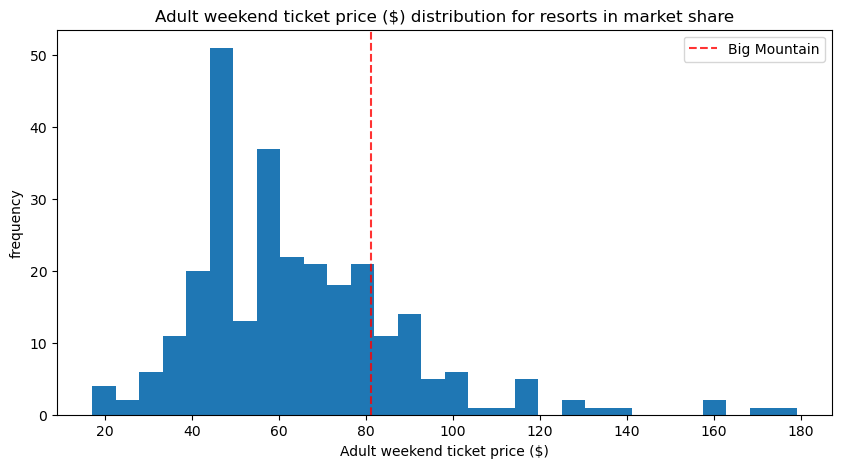

In [312]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($)')

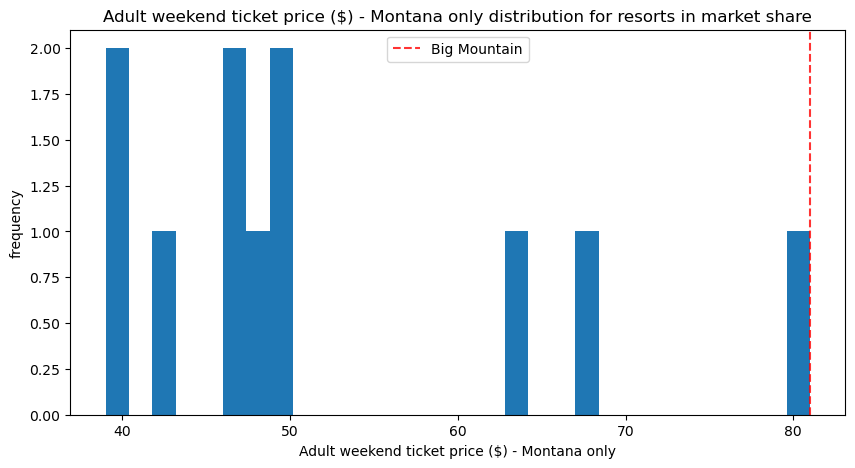

In [314]:
plot_compare('AdultWeekend', 'Adult weekend ticket price ($) - Montana only', state='Montana')

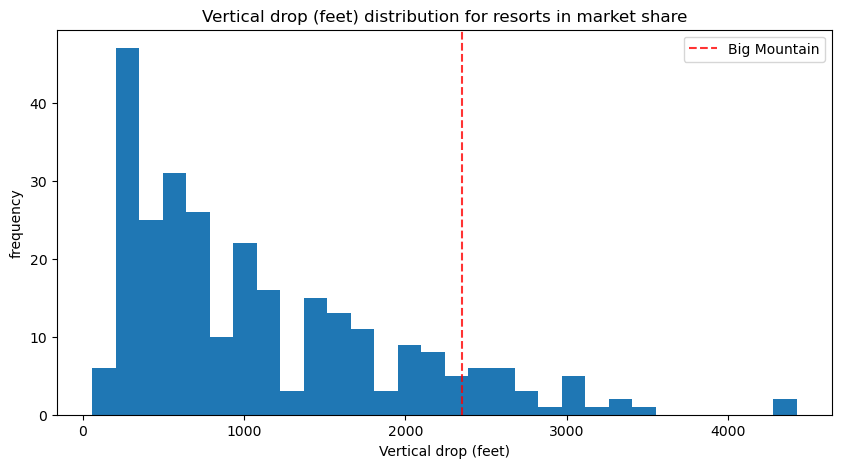

In [315]:
plot_compare('vertical_drop', 'Vertical drop (feet)')

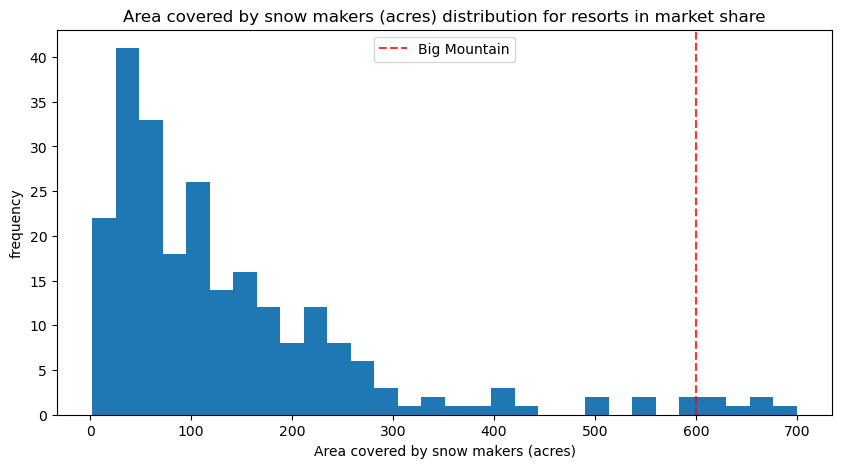

In [316]:
plot_compare('Snow Making_ac', 'Area covered by snow makers (acres)')

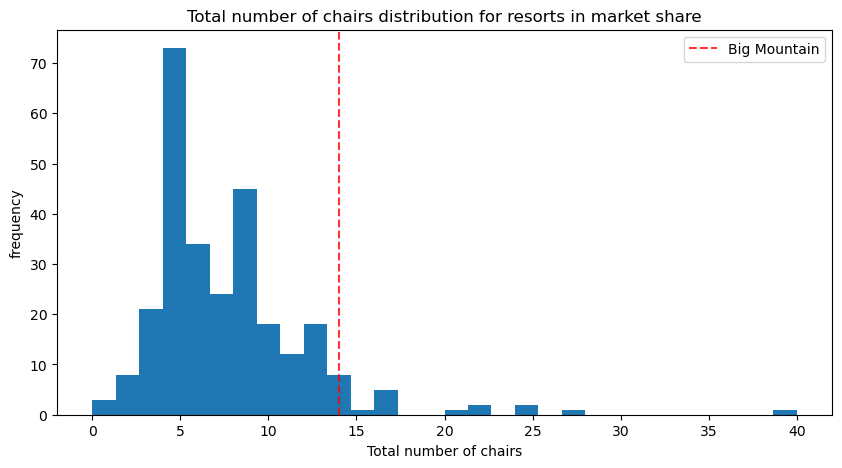

In [317]:
plot_compare('total_chairs', 'Total number of chairs')

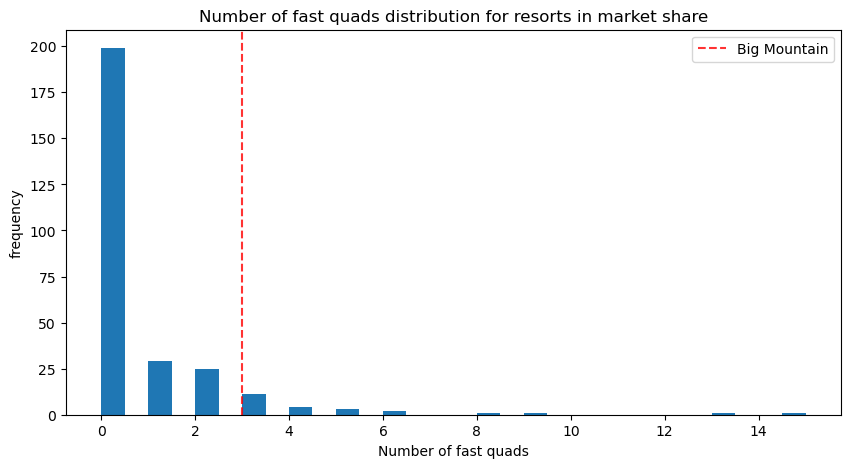

In [318]:
plot_compare('fastQuads', 'Number of fast quads')
#Most resorts have no fast quads, Big Mountain has 3.

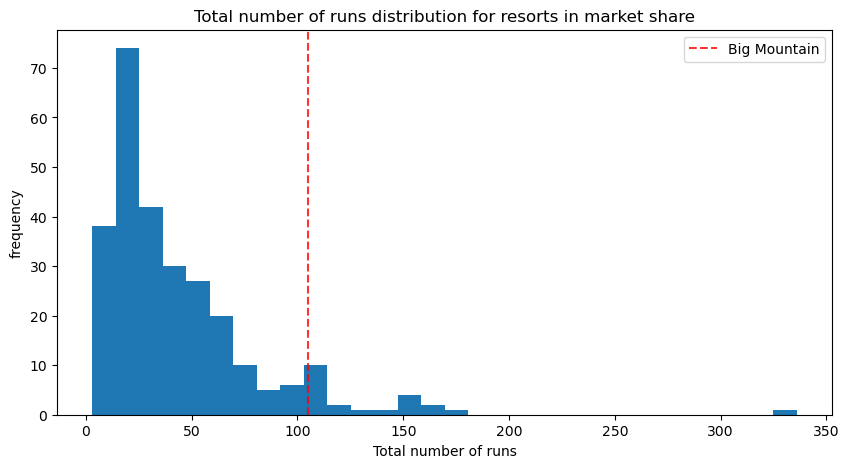

In [319]:
#Big Mountain compares well for the number of runs. Some have more but not many
plot_compare('Runs', 'Total number of runs')

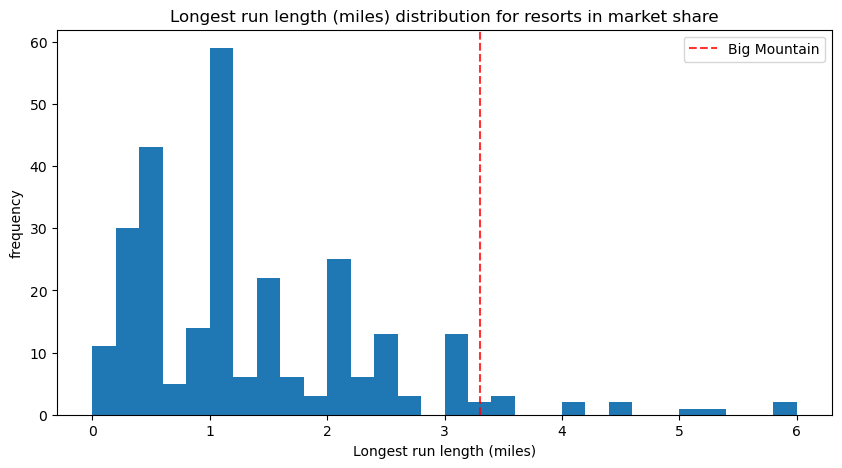

In [320]:
#Big Mountain has the longest runs. Longer ones are very rare
plot_compare('LongestRun_mi', 'Longest run length (miles)')

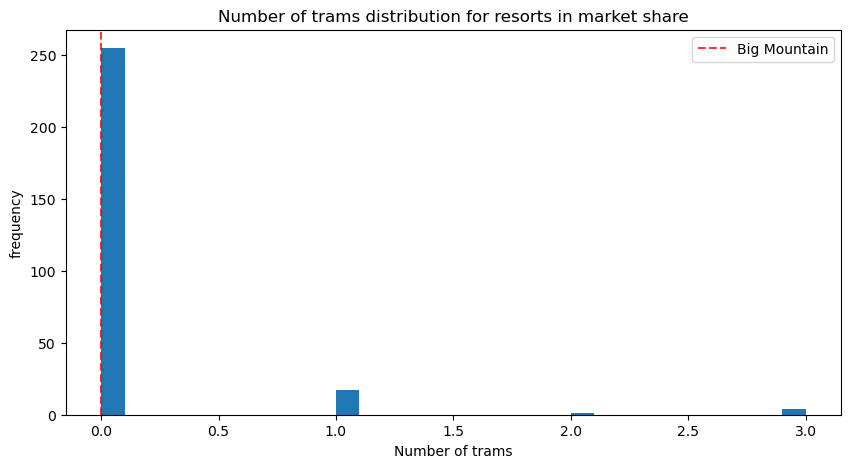

In [321]:
#Most resorts (Big Mountain included), have no trams
plot_compare('trams', 'Number of trams')

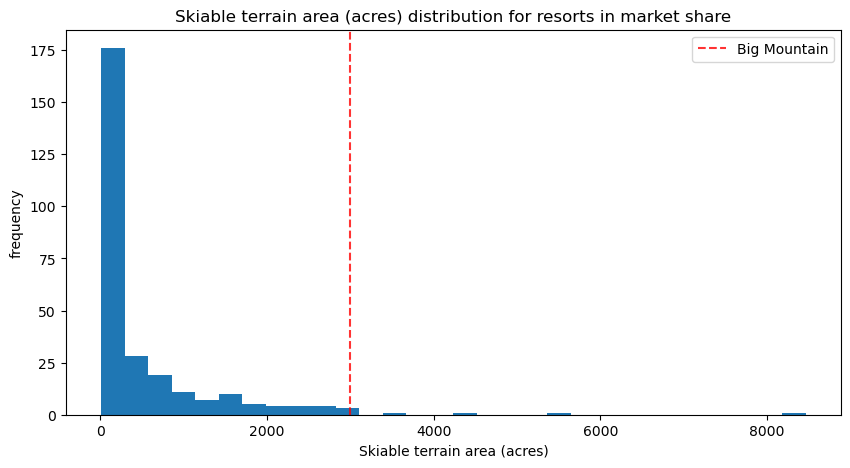

In [322]:
#Big Mountain is amongst the resorts with the largest amount of skiable terrain
plot_compare('SkiableTerrain_ac', 'Skiable terrain area (acres)')

In [323]:
#It is pretty obvious that Big Mountain (were it counts)
#Is in the highest quality of resorts based on skiing experience

In [324]:
#Big Mountain is looking at either increasing revenue (from ticket price)
#Or decreasing the costs that they infer.
#Ticket Price is not determined by any set of parameters, resort has full autonomy to choose.
#But the market chooses, they pay more for some and less for others
#But, Big Mountain is around the average price for the experience (Line 312)
#Although, they are in the higher percentages for quality

In [326]:
#BUT, THERE ARE SOME OPTIONS PUT FORTH BY THE BUSINESS (NEXT LINE)

In [327]:
#1: Permanently close down up to 10 of the least used runs
    #: DOESN'T impact any other resort statistic
#2: Increase the vertical drop by adding a run 150 feet lower down
    #: BUT, requires an additional chair lift to bring skiers up
    #: AND, doesn't add addtional snow making coverage
#3: Same as NUMBER 2 ^
    #: BUT, adding an additional 2 acres of snow making cover
#4: Increase the longest run by 0.2 miles, to boast 3.5 miles length
    #:BUT, requires an additional snow making coverage of 4 acres.

In [328]:
#The expected NUMBER of visitors over the whole season in 350,000 on average
#AVG, skiiers visit for 5 days.
#USE this ASSUMPTION and the provided data includes the additional
    #lift that Big Mountain recently installed.

In [354]:
#Assumption coding
expected_visitors = 350_000

In [332]:
#Important features we want to use
all_feats = ['vertical_drop', 'Snow Making_ac', 'total_chairs', 'fastQuads', 
             'Runs', 'LongestRun_mi', 'trams', 'SkiableTerrain_ac']

In [334]:
big_mountain[all_feats]

,vertical_drop,Snow Making_ac,total_chairs,fastQuads,Runs,LongestRun_mi,trams,SkiableTerrain_ac
124,2353,600.0,14,3,105.0,3.3,0,3000.0


In [335]:
#Code task 2# THE FOLLOWING CODE
#In this function, copy the Big Mountain data into a new data frame
#(Note we use .copy()!)
#And then for each feature, and each of its deltas (changes from the original),
#create the modified scenario dataframe (bm2) and make a ticket price prediction
#for it. The difference between the scenario's prediction and the current
#prediction is then calculated and returned.
#Complete the code to increment each feature by the associated delta

In [337]:
#.copy(), copies the data into a new data frame
def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.
    
    Arguments:
    features - list, names of the features in the ski_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features
    
    Outputs:
    Amount of increase in the predicted ticket price
    """
    
    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[features] += deltas
    return model.predict(bm2).item() - model.predict(X_bm).item()

In [340]:
#Close up to 10 of the least used runs. The # of the runs is the 
    #ONLY parameter varying
[i for i in range (-1, -11, -1)]

[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]

In [343]:
runs_delta = [i for i in range(-1, -11, -1)]
price_deltas = [predict_increase(['Runs'], [delta]) for delta in runs_delta]

In [344]:
price_deltas

[0.0,
 -0.30434782608695343,
 -0.5652173913043441,
 -0.5652173913043441,
 -0.5652173913043441,
 -1.4057971014492665,
 -1.4057971014492665,
 -1.4057971014492665,
 -1.9565217391304373,
 -1.9565217391304373]

In [348]:
#Code task 3#
#Create two plots, side by side, for the predicted ticket price change (delta) for each
#condition (number of runs closed) in the scenario and the associated predicted revenue
#change on the assumption that each of the expected visitors buys 5 tickets
#There are two things to do here:
#1 - use a list comprehension to create a list of the number of runs closed from `runs_delta`
#2 - use a list comprehension to create a list of predicted revenue changes from `price_deltas`

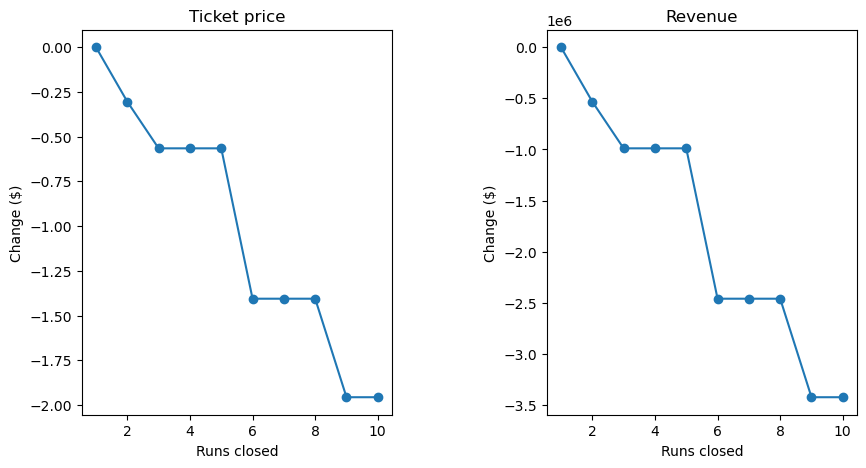

In [370]:
#SCENARIO 1
runs_closed = [-1 * run for run in runs_delta] #1
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
ax[0].plot(runs_closed, price_deltas, 'o-')
ax[0].set(xlabel='Runs closed', ylabel='Change ($)', title='Ticket price')
revenue_deltas = [5 * expected_visitors * revenue for revenue in price_deltas] #2
ax[1].plot(runs_closed, revenue_deltas, 'o-')
ax[1].set(xlabel='Runs closed', ylabel='Change ($)', title='Revenue');

In [ ]:
#Closing one run makes no difference.

In [357]:
#SCENARIO 2:
ticket2_increase = predict_increase(['Runs', 'vertical_drop', 'total_chairs'], [1, 150, 1])
revenue2_increase = 5 * expected_visitors * ticket2_increase

In [364]:
print(f'This scenario increases support for ticket price by ${ticket2_increase:.2f}')
print(f'Over the season, this could be expected to amount to ${revenue2_increase:.0f}')

This scenario increases support for ticket price by $9.81
Over the season, this could be expected to amount to $17170290


In [366]:
#SCENARIO 3:
ticket3_increase = predict_increase(['Runs', 'vertical_drop', 'total_chairs', 'Snow Making_ac'], [1, 150, 1, 2])
revenue3_increase = 5 * expected_visitors * ticket3_increase

In [368]:
print(f'This scenario increases support for ticket price by ${ticket3_increase:.2f}')
print(f'Over the season, this could be expected to amount to ${revenue3_increase:.0f}')

This scenario increases support for ticket price by $10.86
Over the season, this could be expected to amount to $18996377


In [369]:
#Both of these call for a small increase in the price, 8-$10
#BUT, will increase the revenue by approximately $170,000

In [360]:
#Such a small increase^, creates a big difference in revenue

In [362]:
#SCENARIO 4:
predict_increase(['LongestRun_mi', 'Snow Making_ac'], [0.2, 4])

0.0

In [363]:
#^ no difference whatsoever. 